## 학습 목표
- 단어 유사도 분석을 할 수 있다
- 유사도 개념을 이해할 수 있다
- 워드임베딩 개념을 이해하고 활용할 수 있다

### 유사도(Similarity)

#### Euclidean Distance
- 피타고라스의 정리를 기반으로 두 점의 거리를 계산하는 알고리즘
- 거리 값이 가까울수록 유사하다고 판단한다
- 희소한(sparse)한 데이터에서는 잘 동작하지 않음
- Data scale에 민감하게 동작한다
- 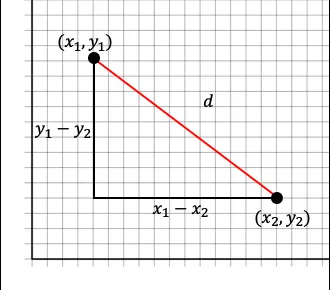

In [51]:
# 유클리디언 유사도 공식
import numpy as np

def euclidean_sim(A, B):
    return ((A-B)**2).sum()**0.5

doc1 = np.array([0,1,1,1])
doc2 = np.array([1,0,1,1])
doc3 = np.array([3,0,3,3])

# 데이터 스케일에 민감하다
print('문서 1과 문서2의 유사도 :',euclidean_sim(doc1, doc2))
print('문서 1과 문서3의 유사도 :',euclidean_sim(doc1, doc3))
print('문서 2와 문서3의 유사도 :',euclidean_sim(doc2, doc3))

문서 1과 문서2의 유사도 : 1.4142135623730951
문서 1과 문서3의 유사도 : 4.242640687119285
문서 2와 문서3의 유사도 : 3.4641016151377544


#### Cosine Similarity
- 두 벡터 사이 각도의 코사인으로 유사성을 계산
- -1 ~ 1 사이 값을 가짐
- 문장의 길이, 단어의 빈도 수 등에 덜 민감하게 동작
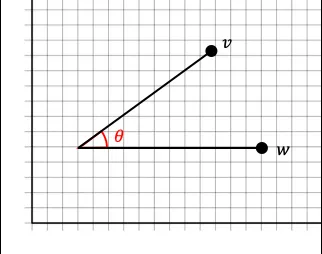

In [52]:
# 코사인 유사도 공식
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

doc1 = np.array([0,1,1,1])
doc2 = np.array([1,0,1,1])
doc3 = np.array([2,0,2,2])

print('문서 1과 문서2의 유사도 :',cos_sim(doc1, doc2))
print('문서 1과 문서3의 유사도 :',cos_sim(doc1, doc3))
print('문서 2와 문서3의 유사도 :',cos_sim(doc2, doc3))

문서 1과 문서2의 유사도 : 0.6666666666666667
문서 1과 문서3의 유사도 : 0.6666666666666667
문서 2와 문서3의 유사도 : 1.0000000000000002


### 워드임베딩(Word Embedding)
- 인공지능 학습을 이용해서 단어를 수치화하는 기법
- 지정된 벡터공간에 단어의 정보를 표현하는 숫자를 이식한다

#### Word2vec 모델을 사용
- 문장이 구성될 때 근처에 배치된 단어끼리는 관련이 있다

In [53]:
# !pip install gensim

In [54]:
import pandas as pd

In [55]:
# 데이터로딩
data = pd.read_csv("./data/naver_shopping.txt", 
                    delimiter="\t", header=None)
data
                    

,0,1
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
199995,2,장마라그런가!!! 달지않아요
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,5,넘이쁘고 쎄련되보이네요~


In [56]:
# 문장에서 명사, 형용사, 동사만 추출하기
from kiwipiepy import Kiwi

In [57]:
Kiwi = Kiwi() # 형태소 분석기 객체 생성

https://github.com/bab2min/Kiwi?tab=readme-ov-file#%ED%92%88%EC%82%AC-%ED%83%9C%EA%B7%B8
- NNG - 일반명사
- VV - 동사
- VA - 형용사

In [58]:
from tqdm import tqdm

In [59]:
total = [] # 형태소로 분리된 문장이 들어갈 리스트
for doc in tqdm(data[1]) : # 전체데이터 반복
    rs = Kiwi.tokenize(doc) # 형태소로 분리
    temp = [] 
    for token in rs : # 한 문장에서 쪼개진 토큰을 확인
        if token.tag in ['NNG','VV','VA'] :
            temp.append(token.form) # 단어토큰 리스트에 추가
    total.append(" ".join(temp)) # 전체리스트에 추가

  4%|▍         | 8248/200000 [00:13<05:20, 598.23it/s]


KeyboardInterrupt: 

In [ ]:
import pickle
with open("./data/naver_morphs.pkl", "wb") as f :
    pickle.dump(total,f)

In [60]:
total[:5]

['공 빠르 굿',
 '택배 엉망 집 밑 층 말 놔두 가',
 '좋 바지 좋 구매 가격 박 바느질 편하 가성비 최고',
 '선물 전달 상품 컵 오 당황 전화 주 하 배송 누락 확인 하 선물 큰일 나 배송 걸리 살 생각 같',
 '민트 색상 예쁘 옆 손잡이 걸 용도 사용']

In [61]:
from gensim.models import Word2Vec

In [62]:
w2v = Word2Vec(window=3, # 인접된 단어의 영역을 결정하는 수
                min_count=5, # 학습단어로 설정하기 위한 최소 등장 횟수 / 등장 빈도가 5 이하인 단어는 제외 
                vector_size=50, # 학습을 통해 임베딩할 단어의 숫자 크기(정보량)
                sg=1, # 학습방법(딥러닝때 설명 듣기)
                sentences = [doc.split(" ") for doc in total] # 학습시킬 문장
                )

In [64]:
택배 = w2v.wv.get_vector("택배")
배송 = w2v.wv.get_vector("배송")
민트 = w2v.wv.get_vector("민트")

KeyError: "Key '민트' not present"

In [65]:
cos_sim(택배, 배송)

0.84507394

In [66]:
cos_sim(택배, 민트)

0.48469892

In [67]:
w2v.wv.most_similar("배송", topn=20)

[('감사', 0.9647163152694702),
 ('포장', 0.9110931158065796),
 ('빠르', 0.886702299118042),
 ('친절', 0.8805812001228333),
 ('느리', 0.87044358253479),
 ('상태', 0.8677118420600891),
 ('만족', 0.8674322962760925),
 ('물건', 0.8650550246238708),
 ('다음', 0.8546081781387329),
 ('좋', 0.8484227061271667),
 ('늦', 0.8483438491821289),
 ('상품', 0.8469128608703613),
 ('택배', 0.8450739979743958),
 ('주문', 0.8373087644577026),
 ('구매', 0.8345538377761841),
 ('기사', 0.8316378593444824),
 ('오', 0.8233398795127869),
 ('제품', 0.821549654006958),
 ('걸리', 0.8053764700889587),
 ('드리', 0.7955784201622009)]

In [68]:
# 네트워크 그래프 시각화
!pip install pyvis


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
keyword = "배송"
rs = w2v.wv.most_similar(keyword, topn=20)

In [70]:
rs

[('감사', 0.9647163152694702),
 ('포장', 0.9110931158065796),
 ('빠르', 0.886702299118042),
 ('친절', 0.8805812001228333),
 ('느리', 0.87044358253479),
 ('상태', 0.8677118420600891),
 ('만족', 0.8674322962760925),
 ('물건', 0.8650550246238708),
 ('다음', 0.8546081781387329),
 ('좋', 0.8484227061271667),
 ('늦', 0.8483438491821289),
 ('상품', 0.8469128608703613),
 ('택배', 0.8450739979743958),
 ('주문', 0.8373087644577026),
 ('구매', 0.8345538377761841),
 ('기사', 0.8316378593444824),
 ('오', 0.8233398795127869),
 ('제품', 0.821549654006958),
 ('걸리', 0.8053764700889587),
 ('드리', 0.7955784201622009)]

In [71]:
from pyvis.network import Network
from IPython.display import HTML

In [74]:
net = Network(notebook=True)
net.add_node(keyword) # 메인 키워드 노드 추가
for word, sim in rs :
  net.add_node(word) # word2vec을 이용해 도출한 연관단어 추가
  net.add_edge(word,keyword, value=sim) # 메인키워드와 연관단어의 연관성을 연결
net.show('my_gragh.html')

my_gragh.html
